# Advanced Machine Learning (CS4662). Cal State Univ. LA, CS Dept.
### Dr. Mohammad Porhoumayoun
----------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------

## Deep Convolutional Neural Networks (CNN) with Keras + TensorFlow
----------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------

In [196]:
import tensorflow as tf
import numpy as np
np.random.seed(0)

In [197]:
# "Sequential" model lets us to define a stack of neural network layers
from keras.models import Sequential

# import the "core" layers:
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D

# CNN
from keras.layers import Convolution2D, MaxPooling2D, LeakyReLU, BatchNormalization

# import some utilities to transform our data
from keras import utils as np_utils

## Let's use the Fashion-MNIST Dataset including 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images:

0:	T-shirt/top, 
1:	Trouser,
2:	Pullover,
3:	Dress,
4:	Coat,
5:	Sandal,
6:	Shirt,
7:	Sneaker,
8:	Bag,
9:	Ankle boot 

In [198]:
# Keras will download MNIST dataset for us:
from keras.datasets import fashion_mnist
 
# By default, the first 60k of MNIST has been defined as training and the rest as testing set: 
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [199]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


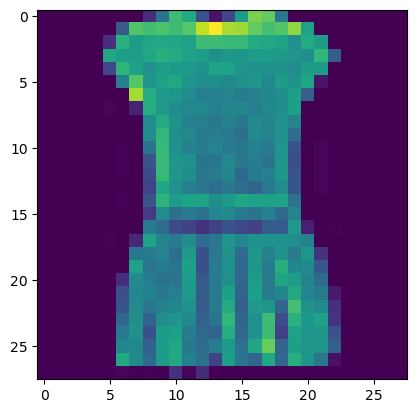

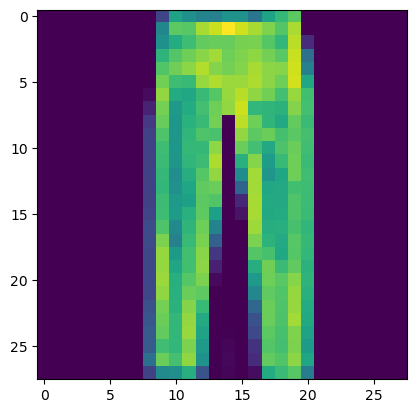

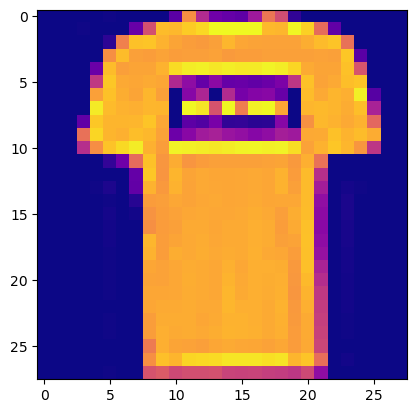

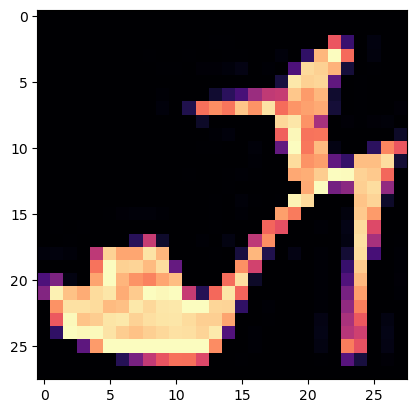

In [200]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

imgplot = plt.imshow(X_train[3,:,:],cmap='viridis')
plt.show()
imgplot = plt.imshow(X_train[16,:,:],cmap='viridis')
plt.show()
imgplot = plt.imshow(X_train[1,:,:],cmap='plasma')
plt.show()
imgplot = plt.imshow(X_train[9,:,:],cmap='magma')
plt.show()


In [201]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [202]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [203]:
# simply normalize the features to the range of [0,1]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [204]:
# output label:
print (y_train.shape)
print (y_train[:10])

(60000,)
[9 0 0 3 0 2 7 2 5 5]


In [205]:
# OneHotEncoding for the output label:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)


In [206]:
# Label after OneHotEncoding:
print (y_train.shape)
print (y_train[:10])

(60000, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


## Define the Network Architecture (model):

In [215]:
# Declare Sequential model fro our network:
model = Sequential()

In [216]:
# CNN first layer (with 32 3x3 filter):
model.add(Convolution2D(64, (3, 3), activation='relu', input_shape=(28,28,1), padding="same"))
print(model.output_shape) # with no zero padding -> (None, 26, 26, 32)
model.add(BatchNormalization())

# If your image batch is of N images of HxW size with C channels: 
# theano uses the NCHW ordering while tensorflow uses the NHWC ordering.

(None, 28, 28, 64)


In [217]:
# more hidden layers:
model.add(Convolution2D(64, (3, 3), activation='relu', padding="same"))
model.add(BatchNormalization())
print(model.output_shape)

model.add(Convolution2D(64, (3, 3), activation='relu', padding="same"))
model.add(BatchNormalization())

# Pooling Layer:
model.add(MaxPooling2D(pool_size=(2,2)))
print(model.output_shape)

# Dropout layer to avoid overfitting
model.add(Dropout(0.4))


(None, 28, 28, 64)
(None, 14, 14, 64)


In [218]:
model.add(Convolution2D(128, (3, 3), activation='relu', padding="same"))
model.add(BatchNormalization())
model.add(Convolution2D(128, (3, 3), activation='relu', padding="same"))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

In [220]:
# output Fully connected Dense layers:
model.add(Flatten())
print(model.output_shape)

model.add(Dense(256))
print(model.output_shape)

model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())

model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))
print(model.output_shape)

(None, 256)
(None, 256)
(None, 10)


## Compile the model:
#### We need to compile the model and then it will be ready to train it:

In [221]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

# Define callbacks for early stopping and model checkpoint
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)
# more info about loss functions: https://keras.io/losses
# more infor about Optimizers: https://keras.io/optimizers

print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 batch_normalization_28 (Ba  (None, 28, 28, 64)        256       
 tchNormalization)                                               
                                                                 
 conv2d_39 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 batch_normalization_29 (Ba  (None, 28, 28, 64)        256       
 tchNormalization)                                               
                                                                 
 conv2d_40 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 batch_normalization_30 (Ba  (None, 28, 28, 64)       

## Training:

In [222]:
# Train the model with adjusted batch size and epochs, and use validation data
history = model.fit(X_train, y_train, batch_size=128, epochs=50, validation_data=(X_test, y_test),
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/50
469/469 [==============================] - ETA: 0s - loss: 0.7823 - accuracy: 0.7356
Epoch 1: val_accuracy improved from -inf to 0.55140, saving model to best_model.h5
469/469 [==============================] - 114s 240ms/step - loss: 0.7823 - accuracy: 0.7356 - val_loss: 1.3318 - val_accuracy: 0.5514
Epoch 2/50
469/469 [==============================] - ETA: 0s - loss: 0.4779 - accuracy: 0.8325
Epoch 2: val_accuracy improved from 0.55140 to 0.86920, saving model to best_model.h5
469/469 [==============================] - 113s 240ms/step - loss: 0.4779 - accuracy: 0.8325 - val_loss: 0.3680 - val_accuracy: 0.8692
Epoch 3/50
469/469 [==============================] - ETA: 0s - loss: 0.3895 - accuracy: 0.8626
Epoch 3: val_accuracy improved from 0.86920 to 0.89040, saving model to best_model.h5
469/469 [==============================] - 110s 236ms/step - loss: 0.3895 - accuracy: 0.8626 - val_loss: 0.3083 - val_accuracy: 0.8904
Epoch 4/50
469/469 [==============================] 

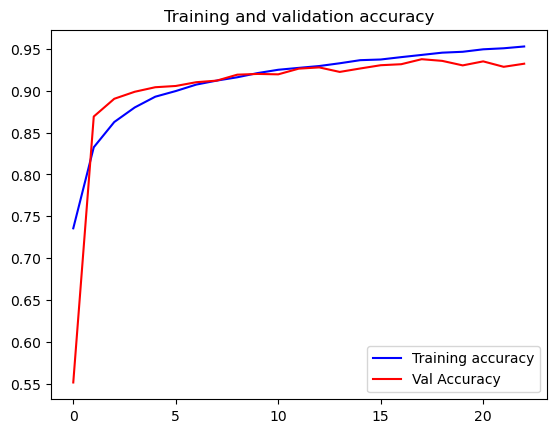

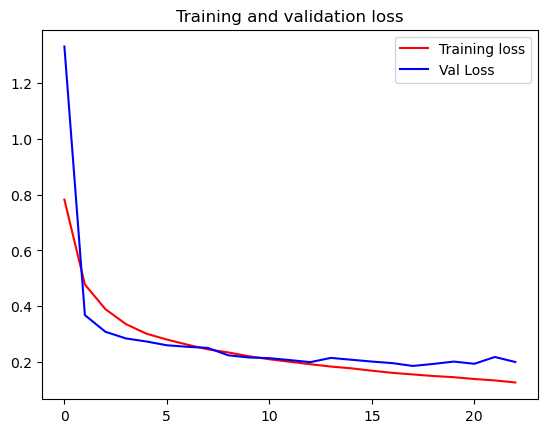

In [223]:
import matplotlib.pyplot as plt

%matplotlib inline

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'b-', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Val Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Val Loss')
plt.title('Training and validation loss')
plt.legend()
# plt.show()

## Testing:

In [224]:
predicted_classes = model.predict(X_test)

313/313 [==============================] - 6s 20ms/step


In [225]:
# Testing:
score = model.evaluate(X_test, y_test, verbose=1)
print('The accuracy is: ', score[1])

313/313 [==============================] - 6s 20ms/step - loss: 0.1856 - accuracy: 0.9377
The accuracy is:  0.9376999735832214
